#  Finding the average sizes of user requests for each user (in kWh) 

1. Group data set by the hour of arrival
2. Calculate average request size for each hour
3. Plot the change dynamic into a graph

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
#changong data types to datetime format for users table
#dropping sessions with requests higher than 90 kWh (there are no cars with batteries bigger than 90 kWh)

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)

users_drop = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users = users_drop[users_drop.kWhRequested <= 90]
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [50]:
#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])
charging.head()

,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
0,5bc90cb9f9af8b0d7fe77cd2,39,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00
1,5bc90cb9f9af8b0d7fe77cd3,39,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00
2,5bc90cb9f9af8b0d7fe77cd4,39,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00
3,5bc90cb9f9af8b0d7fe77cd5,39,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00
4,5bc90cb9f9af8b0d7fe77cd6,39,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00


# Finding cars - model Smart

In [131]:
# #finding userIDs for Smart cars - step 1
# max_request = users[['userID', 'kWhRequested']].groupby(users.userID).max()
# msk_Smart = (max_request.kWhRequested < 16.5)
# smarts_ID_1 = max_request[msk_Smart].userID
# smarts_ID_1

userID
1          1
17        17
75        75
183      183
190      190
        ... 
6435    6435
6481    6481
6606    6606
6623    6623
6638    6638
Name: userID, Length: 119, dtype: int64

In [230]:
#finding userIDs for Smart cars - step 1
max_request = charging[['userID', 'kWhDelivered']].groupby(charging.userID).max()
msk_Smart = (max_request.kWhDelivered < 16.5)
smarts_ID_1 = max_request[msk_Smart].userID
smarts_ID_1

userID
1.0          1.0
17.0        17.0
45.0        45.0
65.0        65.0
66.0        66.0
           ...  
6481.0    6481.0
6606.0    6606.0
6623.0    6623.0
6638.0    6638.0
6952.0    6952.0
Name: userID, Length: 247, dtype: float64

In [231]:
#selecting user sessions with smarts_ID_1 cars
smarts_mask_u = users.userID.isin(smarts_ID_1)
smarts_u = users[smarts_mask]
smarts_u

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
25,400,8.0,20,60,True,75,2018-06-04 22:53:51+00:00,2018-06-04 23:52:10+00:00
26,400,8.0,20,60,True,75,2018-06-05 03:55:52+00:00,2018-06-04 23:52:10+00:00
64,500,5.0,10,150,True,1,2018-06-22 20:12:18+00:00,2018-06-22 22:41:23+00:00
276,400,8.0,20,60,True,324,2018-09-07 15:49:35+00:00,2018-09-07 16:48:26+00:00
277,400,8.0,20,192,True,324,2018-09-07 15:49:56+00:00,2018-09-07 19:00:26+00:00
...,...,...,...,...,...,...,...,...
17107,400,8.0,20,328,True,5594,2020-06-20 03:10:51+00:00,2020-06-20 08:38:51+00:00
17108,400,8.0,20,328,True,5594,2020-06-20 03:11:29+00:00,2020-06-20 08:38:51+00:00
17109,400,8.0,20,328,True,5594,2020-06-20 06:11:56+00:00,2020-06-20 08:38:51+00:00
17110,400,8.0,20,328,True,5594,2020-06-20 06:12:14+00:00,2020-06-20 08:38:51+00:00


In [232]:
# selecting cars with proper WhPerMile 
max_WhPerMile = users[['userID', 'WhPerMile']].groupby(users.userID).max()
min_WhPerMile = users[['userID', 'WhPerMile']].groupby(users.userID).min()
msk_Smart_1 = (max_WhPerMile.WhPerMile < 340) & (min_WhPerMile.WhPerMile > 300)
smarts_ID_2 = max_WhPerMile[msk_Smart_1].userID
smarts_ID_2


userID
365      365
428      428
519      519
677      677
1297    1297
1725    1725
3831    3831
Name: userID, dtype: int64

In [233]:
#selecting charging sessions with smarts_ID_1 cars
smarts_mask = charging.userID.isin(smarts_ID_1)
smarts_charging = charging[smarts_mask]


# adding a filter by WhPerMile
smarts_mask_2 = smarts_charging.userID.isin(smarts_ID_2)
smarts_charging = smarts_charging[smarts_mask_2]
smarts_charging



,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
13524,5c2e872df9af8b13dab07679,39,8.952,2_39_79_380_2018-11-09 15:57:15.462016,2,CA-489,2-39-79-380,America/Los_Angeles,677.0,2018-11-09 15:57:15+00:00,2018-11-10 01:46:24+00:00,2018-11-09 20:16:21+00:00
13669,5c2e87c4f9af8b13dab0770a,39,11.131,2_39_79_380_2018-11-13 14:23:34.124820,2,CA-489,2-39-79-380,America/Los_Angeles,677.0,2018-11-13 14:23:34+00:00,2018-11-14 01:20:09+00:00,2018-11-13 18:32:56+00:00
13737,5c2e87f6f9af8b13dab0774e,39,1.666,2_39_130_31_2018-11-14 16:06:36.373346,2,CA-306,2-39-130-31,America/Los_Angeles,365.0,2018-11-14 16:06:36+00:00,2018-11-14 16:54:17+00:00,2018-11-14 16:48:26+00:00
13804,5c2e882ef9af8b13dab07791,39,8.833,2_39_78_365_2018-11-15 16:53:33.378261,2,CA-321,2-39-78-365,America/Los_Angeles,677.0,2018-11-15 16:53:33+00:00,2018-11-16 01:19:38+00:00,2018-11-15 19:35:25+00:00
13846,5c2e8868f9af8b13dab077bb,39,14.369,2_39_79_380_2018-11-16 15:19:49.341968,2,CA-489,2-39-79-380,America/Los_Angeles,677.0,2018-11-16 15:19:49+00:00,2018-11-17 02:46:15+00:00,2018-11-16 21:11:59+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
27855,5e7d4915f9af8b180cda61c5,39,4.540,2_39_130_31_2020-03-11 00:17:51.003635,2,CA-306,2-39-130-31,America/Los_Angeles,365.0,2020-03-11 00:17:51+00:00,2020-03-11 01:40:17+00:00,2020-03-11 01:40:14+00:00
27918,5e813d8ff9af8b23a8a39cfc,39,3.277,2_39_139_28_2020-03-14 00:35:56.114144,2,CA-303,2-39-139-28,America/Los_Angeles,365.0,2020-03-14 00:35:56+00:00,2020-03-14 01:36:33+00:00,2020-03-14 01:36:25+00:00
27923,5e828f0cf9af8b279cf8cf20,39,3.868,2_39_129_17_2020-03-15 00:57:31.406861,2,CA-307,2-39-129-17,America/Los_Angeles,365.0,2020-03-15 00:57:31+00:00,2020-03-15 02:04:23+00:00,2020-03-15 02:04:18+00:00
27933,5e83e091f9af8b2b6eaaeaf0,39,2.073,2_39_129_17_2020-03-16 00:33:03.447051,2,CA-307,2-39-129-17,America/Los_Angeles,365.0,2020-03-16 00:33:03+00:00,2020-03-16 01:12:27+00:00,2020-03-16 01:12:22+00:00


In [234]:
#selecting users with smarts_ID_1 cars
smarts_mask = users.userID.isin(smarts_ID_1)
smarts_users = users[smarts_mask]

# adding a filter by WhPerMile
smarts_mask_2 = smarts_users.userID.isin(smarts_ID_2)
smarts_users = smarts_users[smarts_mask_2]
smarts_users

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
1819,325,6.50,20,60,True,677,2018-11-09 16:09:48+00:00,2018-11-09 16:57:15+00:00
1820,325,16.25,50,542,True,677,2018-11-09 16:11:58+00:00,2018-11-10 00:59:15+00:00
1821,325,16.25,50,542,True,677,2018-11-10 01:14:01+00:00,2018-11-10 00:59:15+00:00
2002,325,13.00,40,647,True,677,2018-11-13 14:24:30+00:00,2018-11-14 01:10:34+00:00
2003,325,16.25,50,579,True,677,2018-11-13 14:31:15+00:00,2018-11-14 00:02:34+00:00
...,...,...,...,...,...,...,...,...
16905,333,9.99,30,104,True,365,2020-03-11 00:18:55+00:00,2020-03-11 02:01:51+00:00
16959,333,9.99,30,104,True,365,2020-03-14 00:36:12+00:00,2020-03-14 02:19:56+00:00
16964,333,9.99,30,104,True,365,2020-03-15 00:57:51+00:00,2020-03-15 02:41:31+00:00
16978,333,9.99,30,104,True,365,2020-03-16 00:33:08+00:00,2020-03-16 02:17:03+00:00


In [235]:
smart_users = smarts_users.groupby(['userID'])
smart_users.describe().T 

userID                        365     428         677    1297   1725    3831
WhPerMile        count   96.000000    1.00   47.000000    1.0    1.0    1.00
                 mean   333.000000  333.00  325.000000  310.0  304.0  325.00
                 std      0.000000     NaN    0.000000    NaN    NaN     NaN
                 min    333.000000  333.00  325.000000  310.0  304.0  325.00
                 25%    333.000000  333.00  325.000000  310.0  304.0  325.00
                 50%    333.000000  333.00  325.000000  310.0  304.0  325.00
                 75%    333.000000  333.00  325.000000  310.0  304.0  325.00
                 max    333.000000  333.00  325.000000  310.0  304.0  325.00
kWhRequested     count   96.000000    1.00   47.000000    1.0    1.0    1.00
                 mean     8.394375   16.65   17.453191   31.0   30.4   16.25
                 std      2.365999     NaN    3.935118    NaN    NaN     NaN
                 min      3.330000   16.65    3.250000   31.0   30.4   16.25
                 25%      6.660000   16.65   16.250000   31.0   30.4   16.25
                 50%      9.990000   16.65   19.500000   31.0   30.4   16.25
                 75%      9.990000   16.65   19.500000   31.0   30.4   16.25
                 max      9.990000   16.65   20.150000   31.0   30.4   16.25
milesRequested   count   96.000000    1.00   47.000000    1.0    1.0    1.00
                 mean    25.208333   50.00   53.702128  100.0  100.0   50.00
                 std      7.105101     NaN   12.108055    NaN    NaN     NaN
                 min     10.000000   50.00   10.000000  100.0  100.0   50.00
                 25%     20.000000   50.00   50.000000  100.0  100.0   50.00
                 50%     30.000000   50.00   60.000000  100.0  100.0   50.00
                 75%     30.000000   50.00   60.000000  100.0  100.0   50.00
                 max     30.000000   50.00   62.000000  100.0  100.0   50.00
minutesAvailable count   96.000000    1.00   47.000000    1.0    1.0    1.00
                 mean   100.104167  209.00  388.787234  480.0  603.0   60.00
                 std     26.796496     NaN  233.553265    NaN    NaN     NaN
                 min     60.000000  209.00   35.000000  480.0  603.0   60.00
                 25%     81.750000  209.00  219.500000  480.0  603.0   60.00
                 50%    104.000000  209.00  385.000000  480.0  603.0   60.00
                 75%    104.000000  209.00  494.000000  480.0  603.0   60.00
                 max    205.000000  209.00  995.000000  480.0  603.0   60.00

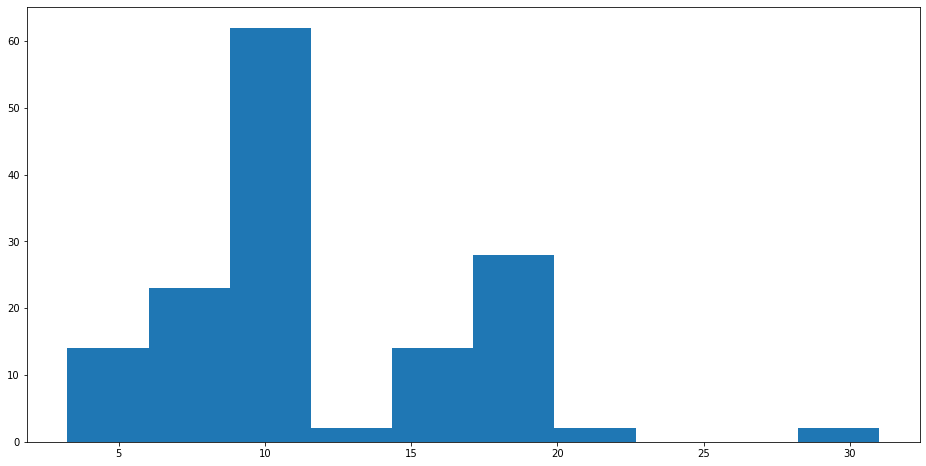

In [236]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(smarts_users.kWhRequested)

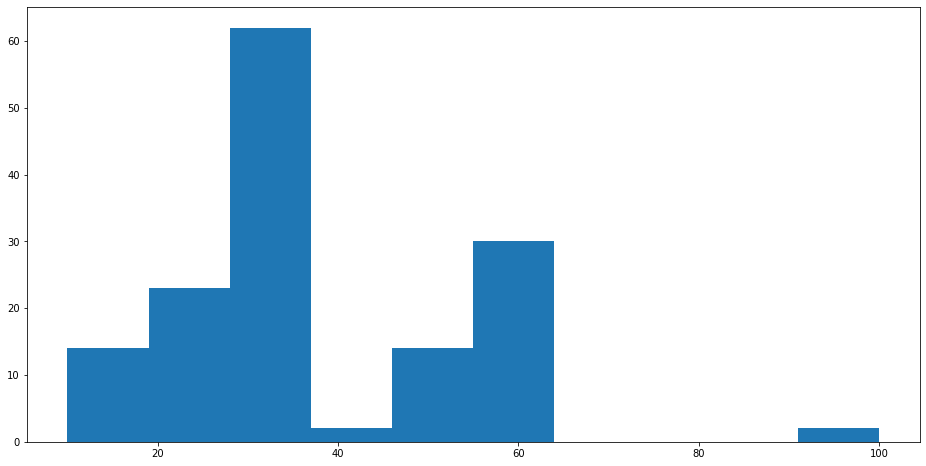

In [237]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(smarts_users.milesRequested)

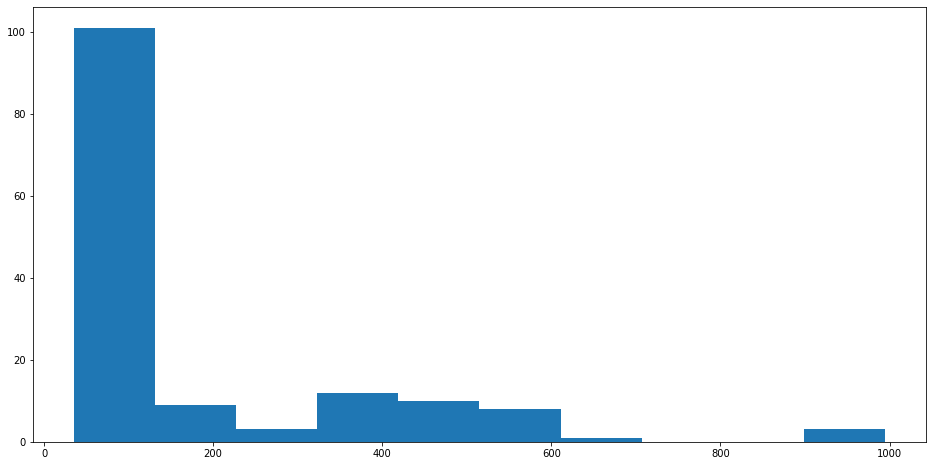

In [238]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(smarts_users.minutesAvailable)

# Using bootstrapping to check out means distributions for smart drivrs miles requests

In [239]:
all_data = list(smarts_users.milesRequested)

In [240]:
def bootstrap_mean(data, n_samples = 10000):
    bootsrtap_means = []
    for i in range(n_samples):
        bootstrap_sample = np.random.choice(data, size = len(data), replace = True)
        bootsrtap_means.append(np.mean(bootstrap_sample))
    return bootsrtap_means


In [241]:
all_boot_means = bootstrap_mean(all_data)

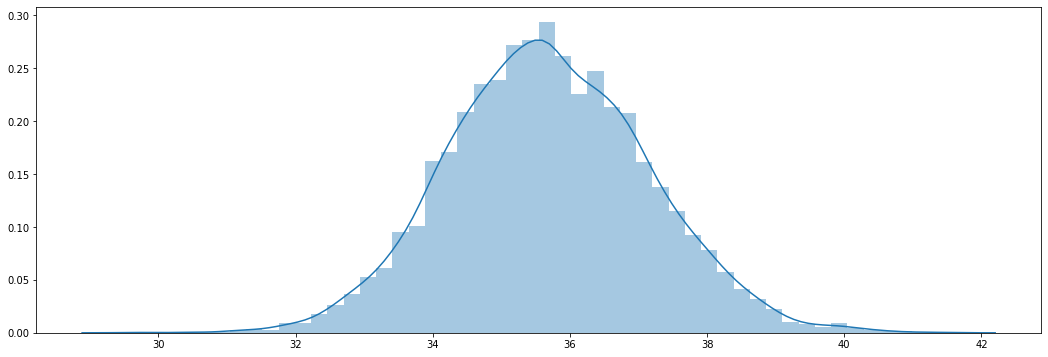

In [242]:
ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_boot_means)
#ax = plt.hist(all_tesla_boot_means)

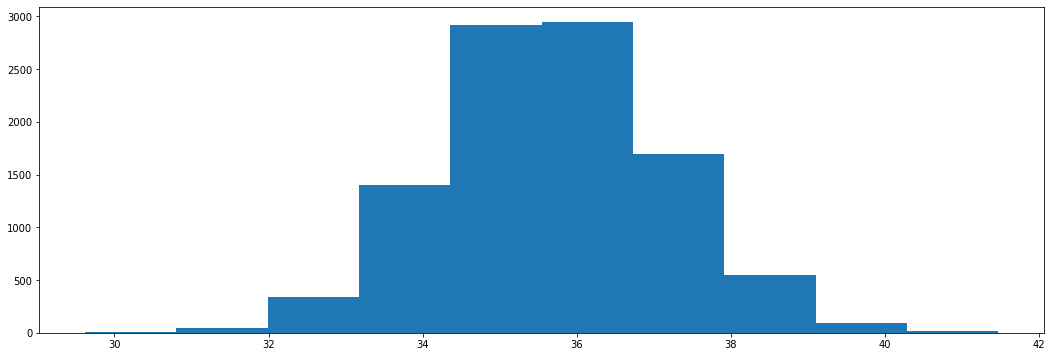

In [243]:
ax, fig = plt.subplots(figsize = (18, 6))
#ax = sns.distplot(all_tesla_boot_means)
ax = plt.hist(all_boot_means)

In [244]:
#variance of bootstrapped means for all tesla users
all_var = np.var(all_data) 
all_var_boot = np.var(all_boot_means)
boot_mean = np.mean(all_boot_means)

print('All Smart users sample mean: 25.20')
print(f'All Smart users bootsrtap sample mean: {boot_mean}')

print(f'Variance of all Smart users charge request: {all_var}')  #why the hell it is so big???
print(f'Variance of all Smart users means: {all_var_boot}')

All Smart users sample mean: 25.20
All Smart users bootsrtap sample mean: 35.68273469387755
Variance of all Smart users charge request: 313.0362349021241
Variance of all Smart users means: 2.112104963487436


In [245]:
#confidence interval for all tesla users
left = np.percentile(all_boot_means, 2.5)
right = np.percentile(all_boot_means, 97.5)
left, right

(32.89795918367347, 38.585034013605444)

# Using bootstrapping to check out means distributions for smartdrivrs kWh requests

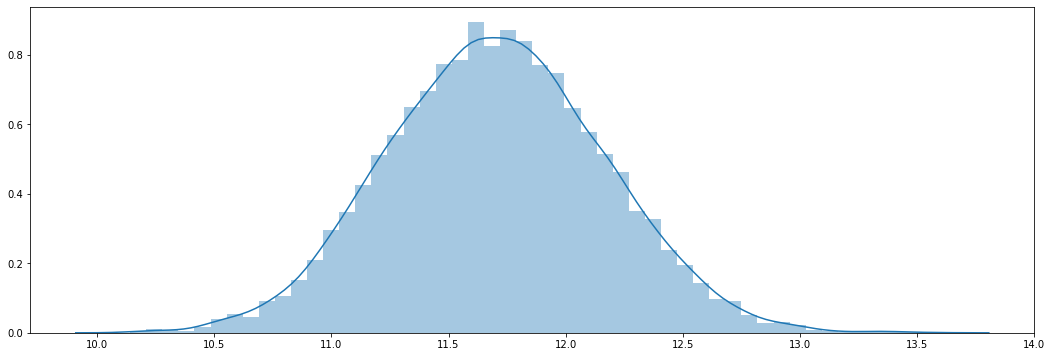

In [252]:
all_data_kWh = list(smarts_users.kWhRequested)
all_kWh_boot_means = bootstrap_mean(all_data_kWh)

ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_kWh_boot_means)

In [253]:
#variance of bootstrapped means for all smart users
all_var_kWh = np.var(all_data_kWh)
all_var_boot_kWh = np.var(all_kWh_boot_means)
boot_mean_kWh = np.mean(all_kWh_boot_means)

print('All Smart users sample mean: 8.39')
print(f'All Smart users bootsrtap sample mean: {boot_mean_kWh}')

print(f'Variance of all Smart users charge request: {all_var_kWh}')
print(f'Variance of all Smart users means: {all_var_boot_kWh}')

All Smart users sample mean: 8.39
All Smart users bootsrtap sample mean: 11.703125061224489
Variance of all Smart users charge request: 31.4025514739229
Variance of all Smart users means: 0.212730247727361


In [ ]:
## finding bootsrtap confidence interval for the sample mean

In [255]:
left = np.percentile(all_kWh_boot_means, 15)
right = np.percentile(all_kWh_boot_means, 85)
left, right

(11.221622448979591, 12.18626870748299)

# Using bootstrapping to check out means distributions for smart kWhDelivered 

In [256]:
smarts_charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,125.0,125.000000,125.0,125.000000
mean,39.0,4.518904,2.0,476.464000
std,0.0,3.761763,0.0,355.977358
min,39.0,0.544000,2.0,365.000000
25%,39.0,1.897000,2.0,365.000000
50%,39.0,3.135000,2.0,365.000000
75%,39.0,4.783000,2.0,365.000000
max,39.0,15.667000,2.0,3831.000000


In [257]:
smarts_charging.T

,13524,13669,13737,13804,13846,13899,13921,13951,14010,14066,...,27575,27637,27660,27680,27783,27855,27918,27923,27933,28039
_id,5c2e872df9af8b13dab07679,5c2e87c4f9af8b13dab0770a,5c2e87f6f9af8b13dab0774e,5c2e882ef9af8b13dab07791,5c2e8868f9af8b13dab077bb,5c2e8889f9af8b13dab077f0,5c2e889df9af8b13dab07806,5c2e88c8f9af8b13dab07824,5c2e88f8f9af8b13dab0785f,5c2e891df9af8b13dab07897,...,5e701a0df9af8b4841ae7d57,5e740e9ff9af8b7848854fca,5e740e9ff9af8b7848854fe1,5e756020f9af8b7bfd91e217,5e7954b0f9af8b090600ec84,5e7d4915f9af8b180cda61c5,5e813d8ff9af8b23a8a39cfc,5e828f0cf9af8b279cf8cf20,5e83e091f9af8b2b6eaaeaf0,5f0e4e0af9af8b2cf1b36e65
clusterID,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
kWhDelivered,8.952,11.131,1.666,8.833,14.369,11.711,2.923,10.367,14.863,14.171,...,3.297,7.312,4.572,10.313,5.428,4.54,3.277,3.868,2.073,1.39
sessionID,2_39_79_380_2018-11-09 15:57:15.462016,2_39_79_380_2018-11-13 14:23:34.124820,2_39_130_31_2018-11-14 16:06:36.373346,2_39_78_365_2018-11-15 16:53:33.378261,2_39_79_380_2018-11-16 15:19:49.341968,2_39_79_380_2018-11-17 16:07:37.962697,2_39_88_24_2018-11-18 19:21:15.467611,2_39_79_381_2018-11-19 15:08:05.538868,2_39_79_381_2018-11-20 15:05:38.601773,2_39_79_376_2018-11-21 15:23:29.126785,...,2_39_131_30_2020-02-29 17:37:13.423046,2_39_79_378_2020-03-03 16:57:02.205699,2_39_139_28_2020-03-04 01:14:31.692921,2_39_78_366_2020-03-04 17:35:49.188099,2_39_139_28_2020-03-08 01:19:32.578632,2_39_130_31_2020-03-11 00:17:51.003635,2_39_139_28_2020-03-14 00:35:56.114144,2_39_129_17_2020-03-15 00:57:31.406861,2_39_129_17_2020-03-16 00:33:03.447051,2_39_129_17_2020-06-27 23:51:55.389105
siteID,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
spaceID,CA-489,CA-489,CA-306,CA-321,CA-489,CA-489,CA-314,CA-490,CA-490,CA-324,...,CA-305,CA-326,CA-303,CA-323,CA-303,CA-306,CA-303,CA-307,CA-307,CA-307
stationID,2-39-79-380,2-39-79-380,2-39-130-31,2-39-78-365,2-39-79-380,2-39-79-380,2-39-88-24,2-39-79-381,2-39-79-381,2-39-79-376,...,2-39-131-30,2-39-79-378,2-39-139-28,2-39-78-366,2-39-139-28,2-39-130-31,2-39-139-28,2-39-129-17,2-39-129-17,2-39-129-17
timezone,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,...,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles
userID,677,677,365,677,677,677,365,677,677,677,...,365,677,365,677,365,365,365,365,365,1297
ConnectionTime,2018-11-09 15:57:15+00:00,2018-11-13 14:23:34+00:00,2018-11-14 16:06:36+00:00,2018-11-15 16:53:33+00:00,2018-11-16 15:19:49+00:00,2018-11-17 16:07:38+00:00,2018-11-18 19:21:15+00:00,2018-11-19 15:08:06+00:00,2018-11-20 15:05:39+00:00,2018-11-21 15:23:29+00:00,...,2020-02-29 17:37:13+00:00,2020-03-03 16:57:02+00:00,2020-03-04 01:14:32+00:00,2020-03-04 17:35:49+00:00,2020-03-08 01:19:33+00:00,2020-03-11 00:17:51+00:00,2020-03-14 00:35:56+00:00,2020-03-15 00:57:31+00:00,2020-03-16 00:33:03+00:00,2020-06-27 23:52:13+00:00


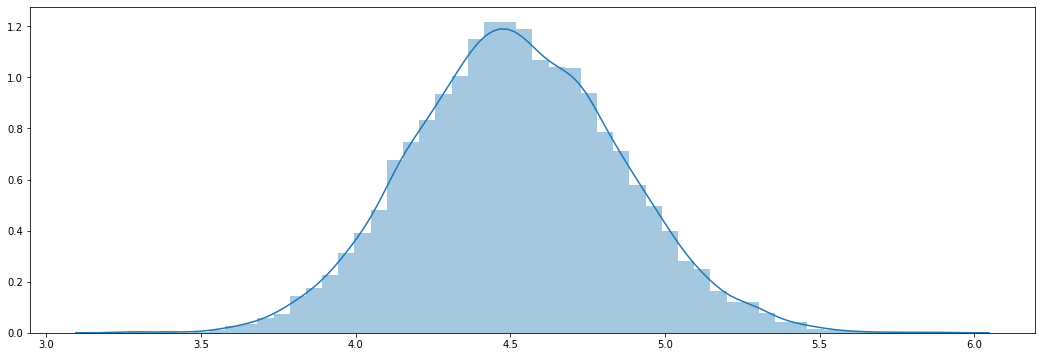

In [258]:
all_data_kWhDelivered = list(smarts_charging.kWhDelivered)
all_kWhDelivered_boot_means = bootstrap_mean(all_data_kWhDelivered)

ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_kWhDelivered_boot_means)

In [259]:
#variance of bootstrapped means for all smart users sessions (kWhDelivered)
all_var_kWh = np.var(all_data_kWhDelivered)
all_var_boot_kWh = np.var(all_kWhDelivered_boot_means)
boot_mean_kWh = np.mean(all_kWhDelivered_boot_means)

print('All Smart kWhDelivered sample mean: 2.86')
print(f'All Smart kWhDelivered bootsrtap sample mean: {boot_mean_kWh}')

print(f'Variance of all Smart  kWhDelivered: {all_var_kWh}')
print(f'Variance of all Smart kWhDelivered means: {all_var_boot_kWh}')

All Smart kWhDelivered sample mean: 2.86
All Smart kWhDelivered bootsrtap sample mean: 4.519385128000001
Variance of all Smart  kWhDelivered: 14.037654486784
Variance of all Smart kWhDelivered means: 0.11195520215423481


In [260]:
## finding bootsrtap confidence interval for the sample mean

In [261]:
left = np.percentile(all_kWhDelivered_boot_means, 15)
right = np.percentile(all_kWhDelivered_boot_means, 85)
left, right

(4.1704479999999995, 4.8670344000000005)